# Factor Investing no Ibovespa

### Introdução 

Factor investing, ou investimento baseado em fatores, é uma abordagem de investimento que se concentra em fatores específicos que afetam o desempenho dos ativos. Esses fatores podem incluir características fundamentais dos ativos, como tamanho de mercado, valor contábil, volatilidade, qualidade ou momentum, entre outros. 

Nesse projeto utilizamos um backtesting dos últimos 6 anos, escolhendo as 8 melhores ações do índice ibovespa e utilizando como critério o fator momento 7 meses com o intuito de criar uma carteira de investimento com uma rentabilidade maior que a própria ibovespa.

###  Obejetivo

Criação de um modelo que ao ser executado nos devolva 8 ações cujo a rentabilidade média calculada em um período de 7 meses sejam as maiores entre todas as ações inclusas no índice Ibovespa

### Materiais e Métodos 

Iremos ler a composição histórica do Ibovespa e os tickers que já passaram pelo índice.
Puxaremos as cotações de todas as empresas que farão parte do backtest.
Calcularemos a média dos retornos 7 meses.
Retiraremos empresas que não participaram do Ibovespa no período de tempo selecionado.
Criaremos as carteiras de investimento em uma matriz de 0 ou 1.
Calcularemos o retorno mensal das empresas no período de backtest.
Cruzaremos a matriz de retorno mensal com a matriz das carteiras para chegar na rentabilidade do modelo.
Calcularemos a rentabilidade do Ibovespa no período.
Por fim visualizaremos as rentabilidades do modelo contra o Ibovespa.



In [2]:
!pip install quantstats

     ---------------------------------------- 41.3/41.3 kB 1.9 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import pandas as pd
import quantstats as qs

In [57]:
# Abrir a composição histórica
comp_historica = pd.read_excel('composicao_ibov.xlsx')
tickers = pd.read_excel('composicao_ibov.xlsx', sheet_name = 'lista_acoes')

tickers


,tickers
0,ENEV3.SA
1,SOMA3.SA
2,ELET6.SA
3,BIDI4.SA
4,RAIZ4.SA
...,...
102,VVAR11.SA
103,ABEV3.SA
104,BRPR3.SA
105,HYPE3.SA


In [58]:
comp_historica

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,ITUB4,PETR4,ITUB4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,PETR4,ITUB4,PETR4
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,PETR3,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,PETR3,BBDC4,BBDC4,BBDC4
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,BBDC4,B3SA3,PETR3,PETR3,PETR3,BBDC4,BBDC4,PETR3,PETR3,PETR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,GOLL4,CVCB3,CVCB3,EZTC3
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,CASH3,GOLL4,ECOR3,ECOR3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,CASH3,CASH3,EZTC3,CASH3,POSI3,POSI3,ECOR3,GOLL4,CVCB3
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POSI3,POSI3,POSI3,CASH3,POSI3,NaN,NaN,POSI3,POSI3,CASH3


In [59]:
# Puxar as cotações de todas as empresas que farão parte do backtest

dados_cotacoes = yf.download(tickers = tickers['tickers'].to_list(),
                            start = "2015-05-29", end = "2022-12-31")

dados_cotacoes = dados_cotacoes['Adj Close']

dados_cotacoes

[*********************100%***********************]  107 of 107 completed

7 Failed downloads:
- JPSA3.SA: No data found, symbol may be delisted
- BIDI4.SA: No data found, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
- BIDI11.SA: No data found, symbol may be delisted
- BRML3.SA: No data found, symbol may be delisted
- LCAM3.SA: No data found, symbol may be delisted
- SULA11.SA: No data found, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-18,16.490009,31.895069,62.622177,61.206642,NaN,NaN,57.610001,13.989870,40.993549,21.623043,...,21.881435,8.029035,37.946911,NaN,24.308573,11.26,36.939903,NaN,16.199066,46.157440
2019-12-19,16.559113,32.309803,62.553558,61.914349,NaN,NaN,57.709999,13.989870,41.414513,21.942904,...,22.435629,8.089794,38.323044,NaN,24.483276,11.24,37.032772,NaN,16.055704,47.653194
2019-12-20,16.763536,31.944441,61.465412,61.914349,NaN,NaN,57.000000,14.145441,41.333553,21.633448,...,22.731199,8.098474,38.883694,NaN,24.375126,11.37,37.806702,NaN,16.194281,46.138264
2019-12-23,16.807861,32.290054,61.367378,62.928085,NaN,NaN,57.599998,13.502990,42.580204,22.068460,...,23.396231,8.272075,38.734665,NaN,25.123848,11.67,37.922798,NaN,16.164736,46.982021
2019-12-26,17.038349,32.448051,61.494820,61.943031,NaN,NaN,57.070000,13.439610,43.065910,22.302193,...,23.645618,8.272075,38.883694,NaN,25.073933,11.80,38.611603,NaN,16.671824,46.598492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.828236,NaN,NaN
2017-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.744440,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.744440,NaN,NaN


In [60]:
# Transformar o índice em data e ordenar a série de tempo.
dados_cotacoes.index = pd.to_datetime(dados_cotacoes.index)
dados_cotacoes = dados_cotacoes.sort_index()

dados_cotacoes


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-29,14.236555,6.685467,23.799561,20.257238,NaN,NaN,NaN,2.771958,14.430483,8.534484,...,30.210819,4.333781,12.760986,16.042191,NaN,6.362684,22.250919,15.229004,5.741956,14.081800
2015-06-01,14.290332,6.698972,23.468353,20.240715,NaN,NaN,NaN,2.866007,14.519329,8.664776,...,30.509327,4.291293,12.754623,16.042191,NaN,6.362684,22.111128,15.308527,5.782249,13.637918
2015-06-02,14.328958,6.617937,23.657616,20.876850,NaN,NaN,NaN,2.925406,14.881040,8.833380,...,30.851734,4.384767,13.588384,17.238655,NaN,6.362684,21.784937,16.401997,5.926640,13.867512
2015-06-03,14.228538,6.658454,22.616678,20.653797,NaN,NaN,NaN,2.913031,14.341641,8.556316,...,30.553219,4.282795,13.295610,16.903645,NaN,6.362684,21.901432,16.451698,5.926640,13.523118
2015-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.451698,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.981815,15.05,11.45,13.165410,34.267910,12.759444,...,12.746346,6.920000,84.465065,NaN,15.75,2.560000,37.196148,NaN,38.228981,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.891987,14.78,11.36,13.234442,34.219345,12.463380,...,12.259920,6.960000,85.238083,NaN,15.24,2.550000,36.325726,NaN,37.921162,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.263187,14.72,10.74,12.770941,33.082912,12.539785,...,12.190430,7.020000,87.273392,NaN,15.05,2.370000,36.180649,NaN,37.742432,9.900000


In [61]:
# Calcular a média dos retornos nos últimos 7 meses e ajustar a tabela com o fator.

r7 = (dados_cotacoes.resample("M").last().pct_change().rolling(7).mean().
                    dropna(axis = 0, how = "all").drop('2022-12-31'))

r7

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.001950,-0.029248,-0.065977,-0.017682,NaN,NaN,NaN,0.004278,-0.047123,-0.025609,...,-0.016049,-0.147154,-0.053107,-0.060219,NaN,-0.124164,-0.011703,-0.185254,-0.014471,-0.031506
2016-01-31,0.000195,-0.002171,-0.057474,-0.028699,NaN,NaN,NaN,-0.009982,-0.067365,-0.042596,...,-0.012267,-0.184219,-0.076857,-0.092112,NaN,-0.159640,-0.019134,-0.162126,-0.025967,-0.050952
2016-02-29,-0.010277,0.037138,-0.059721,-0.022236,NaN,NaN,NaN,0.023767,-0.057441,-0.014066,...,-0.012792,-0.169228,-0.042859,-0.057539,NaN,-0.060308,-0.011987,-0.060618,-0.044619,-0.008536
2016-03-31,0.001905,0.023046,-0.007280,0.018368,NaN,NaN,NaN,0.063214,0.036939,0.040653,...,0.016324,0.009749,-0.002857,-0.005600,NaN,-0.049514,0.021719,0.010680,-0.019768,-0.001055
2016-04-30,0.002799,0.066272,-0.005534,0.036802,NaN,NaN,NaN,0.076270,0.072911,0.053328,...,0.014022,0.046471,0.050635,0.057512,NaN,0.075383,0.034796,0.084867,0.002375,-0.014793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.003146,-0.060367,-0.094451,0.011073,0.035023,NaN,-0.084621,0.013326,0.040819,0.006532,...,-0.009828,-0.066972,-0.005767,0.000000,-0.032003,-0.080970,-0.004796,0.000000,-0.014438,-0.053880
2022-08-31,0.004276,-0.038994,-0.070376,0.025646,0.062656,NaN,-0.055093,-0.022352,0.045491,-0.002959,...,-0.005972,-0.084394,-0.015005,0.000000,-0.027345,-0.017738,-0.020296,0.000000,-0.009613,-0.074785
2022-09-30,0.004607,-0.018176,-0.062861,0.035933,0.045528,NaN,-0.051255,-0.006518,0.024358,0.014543,...,-0.022141,-0.082029,-0.018461,0.000000,-0.037782,0.009078,-0.023345,0.000000,0.021418,-0.044394


In [62]:
# Classificar e retirar empresas que não participaram do Ibovespa no período de tempo selecionado

for data in r7.index:
    for empresa in r7.columns:

        if empresa.replace(".SA", "") not in comp_historica.loc[:, data].to_list():

            r7.loc[data, empresa] = pd.NA
            
r7

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.001950,NaN,-0.065977,NaN,NaN,NaN,NaN,0.004278,-0.047123,-0.025609,...,-0.016049,-0.147154,-0.053107,-0.060219,NaN,NaN,-0.011703,NaN,<NA>,-0.031506
2016-01-31,0.000195,NaN,-0.057474,NaN,NaN,NaN,NaN,-0.009982,-0.067365,-0.042596,...,-0.012267,-0.184219,-0.076857,-0.092112,NaN,NaN,-0.019134,NaN,-0.025967,-0.050952
2016-02-29,-0.010277,NaN,-0.059721,NaN,NaN,NaN,NaN,0.023767,-0.057441,-0.014066,...,-0.012792,-0.169228,-0.042859,-0.057539,NaN,NaN,-0.011987,NaN,-0.044619,-0.008536
2016-03-31,0.001905,NaN,-0.007280,NaN,NaN,NaN,NaN,0.063214,0.036939,0.040653,...,0.016324,0.009749,-0.002857,-0.0056,NaN,NaN,0.021719,NaN,-0.019768,-0.001055
2016-04-30,0.002799,NaN,-0.005534,NaN,NaN,NaN,NaN,0.076270,0.072911,0.053328,...,0.014022,0.046471,0.050635,0.057512,NaN,NaN,0.034796,NaN,0.002375,-0.014793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.003146,-0.060367,-0.094451,<NA>,0.035023,NaN,-0.084621,0.013326,0.040819,0.006532,...,-0.009828,-0.066972,-0.005767,NaN,-0.032003,-0.08097,-0.004796,NaN,-0.014438,-0.053880
2022-08-31,0.004276,-0.038994,-0.070376,<NA>,0.062656,NaN,-0.055093,-0.022352,0.045491,-0.002959,...,-0.005972,-0.084394,-0.015005,NaN,-0.027345,-0.017738,-0.020296,NaN,-0.009613,-0.074785
2022-09-30,0.004607,-0.018176,-0.062861,0.035933,0.045528,NaN,-0.051255,-0.006518,0.024358,0.014543,...,-0.022141,-0.082029,-0.018461,NaN,-0.037782,0.009078,-0.023345,NaN,0.021418,-0.044394


In [70]:
# Criar as carteiras de investimento em uma matriz de 0 ou 1
# Isso servirá para quando aplicarmos uma ação no r7.rank e quando esse rank for menor que 9 será 1. É importante virar 1 pois quando pegarmos os dados_cotacoes e multiplicarmos pelos retornos mensais, quando estiver com 1 trará ele mesmo.
# Para pegar as 8 ações que farão parte da nossa carteira no dia que escolhemos.

###r7.rank(axis = 1, ascending = False).T.sort_values('2015-12-31')

carteiras = r7.rank(axis = 1, ascending = False)

for data in carteiras.index:
    for empresa in carteiras.columns:

        if carteiras.loc[data, empresa] < 9:

            carteiras.loc[data, empresa] = 1
            
        else:
            
            carteiras.loc[data, empresa] = 0
            

            
            
carteiras


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Calcular o retorno mensal das empresas no período de backtest

retorno_mensal = dados_cotacoes.resample("M").last().pct_change()
retorno_mensal = retorno_mensal.drop(retorno_mensal.index[:8], axis = 0)
carteiras.index = retorno_mensal.index

carteiras.T.sort_values('2022-12-31', ascending = false)

NameError: name 'false' is not defined

In [105]:
carteira_invest = (carteiras.T.sort_values('2022-12-31', ascending = False).head(8))['2022-12-31']

carteira_invest

PRIO3.SA    1.0
POSI3.SA    1.0
CIEL3.SA    1.0
GOAU4.SA    1.0
GGBR4.SA    1.0
PETR4.SA    1.0
PETR3.SA    1.0
SBSP3.SA    1.0
Name: 2022-12-31 00:00:00, dtype: float64

In [81]:
retorno_mensal

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.045378,0.023876,-0.129350,-0.095238,NaN,NaN,NaN,-0.057851,-0.060380,-0.043574,...,-0.017701,-0.451613,-0.254029,-0.293659,NaN,-0.173333,-0.083430,-0.107034,0.034114,-0.160573
2016-02-29,-0.048030,0.219479,-0.128959,-0.062632,NaN,NaN,NaN,0.132554,-0.022382,0.188886,...,0.064734,0.058824,0.215020,0.182321,NaN,0.814516,0.095161,0.482877,-0.142028,0.089667
2016-03-31,0.065760,-0.123003,0.229437,0.311061,NaN,NaN,NaN,0.320998,0.475474,0.293588,...,0.111854,1.011111,0.282811,0.329439,NaN,0.075556,0.130946,0.286374,0.069195,-0.071317
2016-04-30,0.031383,0.193548,-0.035211,0.038544,NaN,NaN,NaN,0.119218,0.118361,0.027804,...,0.036348,0.381215,0.299670,0.383128,NaN,0.227522,-0.009379,0.100806,0.080427,0.034552
2016-05-31,-0.014440,0.084495,-0.277372,0.026240,NaN,NaN,NaN,-0.067894,-0.249184,-0.126904,...,-0.057581,-0.332000,-0.277806,-0.285896,NaN,-0.124579,-0.030320,0.016313,-0.052042,-0.085089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.022773,-0.061392,0.167143,0.167404,0.160252,0.083157,0.405797,0.068530,0.164769,0.095988,...,0.066194,-0.068525,-0.027340,0.000000,0.102703,0.341667,-0.077578,0.000000,0.008916,-0.070943
2022-09-30,0.017682,0.030523,0.039168,0.065043,-0.045677,-0.118412,-0.107338,0.108099,-0.069854,0.030794,...,-0.133038,-0.062344,0.116899,0.000000,-0.042928,-0.009317,-0.011481,0.000000,0.137732,0.173842
2022-10-31,0.029601,0.032440,-0.084806,0.061884,0.129345,0.101107,0.095788,0.152490,-0.038941,0.021246,...,0.143223,-0.038564,-0.068157,0.000000,0.057971,-0.018809,0.020252,0.000000,0.253267,0.116263


In [86]:
# Cruzar a matriz de retorno mensal com a matriz das carteiras para chegar na rentabilidade do modelo

retorno_modelo = (carteiras * retorno_mensal).sum(axis = 1)/8 #ao invés de '8' podemos colocar um loop for para fazer varios modelos

retorno_modelo

Date
2016-01-31   -0.069522
2016-02-29    0.060109
2016-03-31    0.074721
2016-04-30    0.186030
2016-05-31   -0.182579
                ...   
2022-08-31    0.097156
2022-09-30   -0.055039
2022-10-31    0.083444
2022-11-30   -0.083596
2022-12-31   -0.011460
Freq: M, Length: 84, dtype: float64

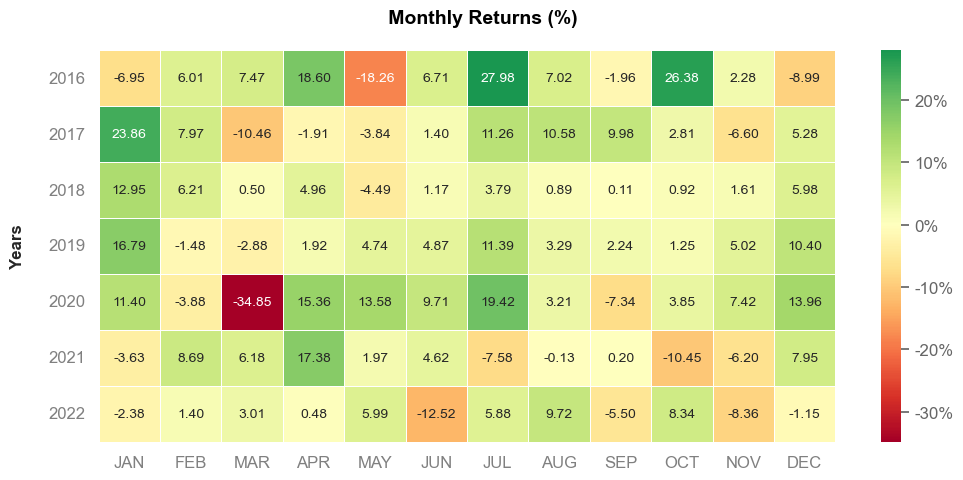

In [88]:
# rentabilidade do modelo com o quantstats
qs.extend_pandas() #extendendo o pandas com qs

retorno_modelo.plot_monthly_heatmap()

In [89]:
# Puxar e calcular a rentabilidade do Ibovespa no período

ibovespa = yf.download("^BVSP", start = "2015-12-30", end = "2022-12-31")['Adj Close']

retornos_ibovespa = ibovespa.resample("M").last().pct_change().dropna()

retornos_ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-08-31    0.061629
2022-09-30    0.004693
2022-10-31    0.054527
2022-11-30   -0.030602
2022-12-31   -0.021825
Freq: M, Name: Adj Close, Length: 84, dtype: float64

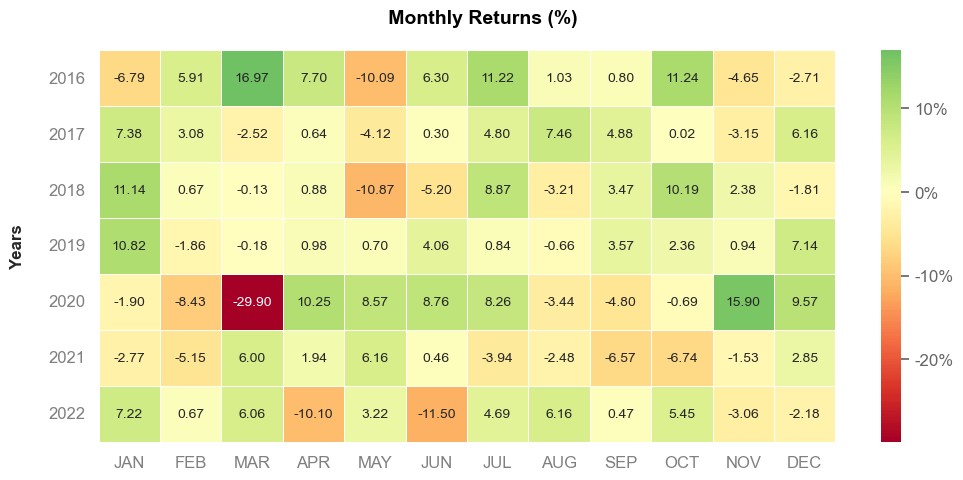

In [93]:
retornos_ibovespa.plot_monthly_heatmap()

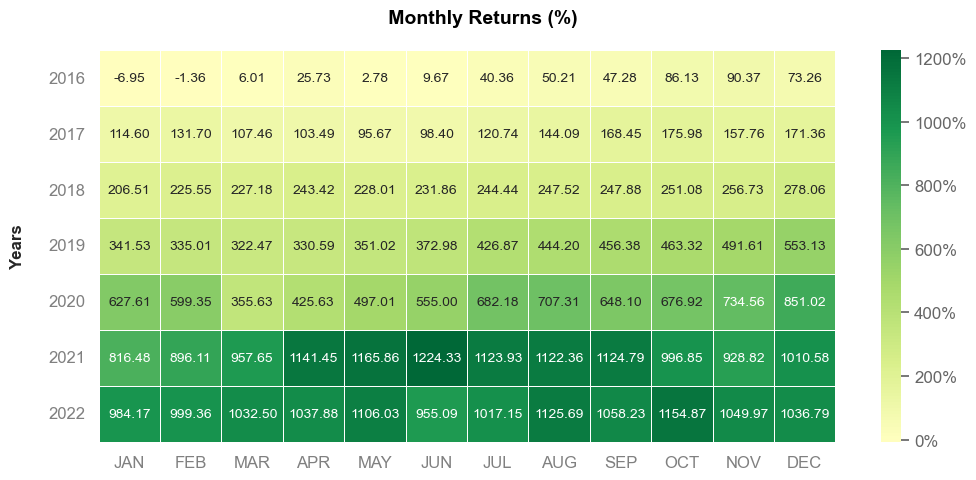

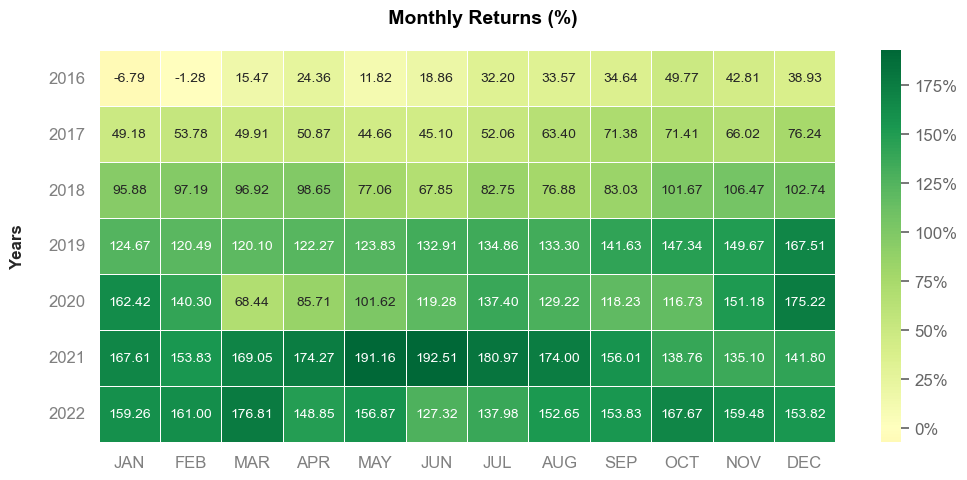

In [94]:
# Calcular e visualizar as rentabilidades do modelo contra o Ibovespa

retorno_acum_modelo = (1 + retorno_modelo).cumprod() - 1 #formula rentabilidade acumulada

retorno_acum_ibov = (1 + retornos_ibovespa).cumprod() - 1 

retorno_acum_modelo.plot_monthly_heatmap()

retorno_acum_ibov.plot_monthly_heatmap()

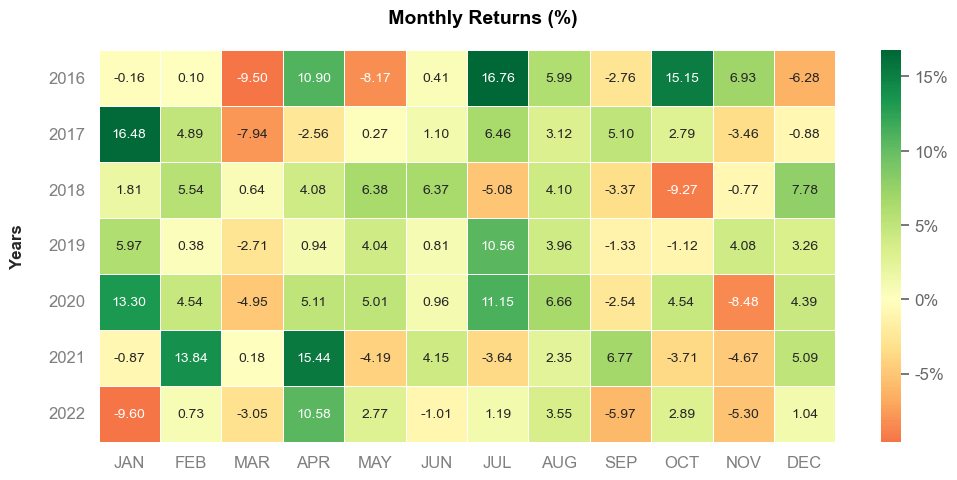

In [95]:
# Calcular e visualizar as rentabilidades do modelo contra o Ibovespa.

overperfom_modelo_menos_ibov = retorno_modelo - retornos_ibovespa

overperfom_modelo_menos_ibov.plot_monthly_heatmap()